In [111]:
%load_ext autoreload
%autoreload 2

import json
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d

from parsing import make_position_dataframe, augment_data


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
with open('0021500495.json', 'r') as json_file:
    event_data = json.load(json_file)

In [6]:
event_ids = []
for event in event_data['events']:
    event_ids.append(event['eventId'])

In [103]:
max_observed_timestep = -1

shot_df = pd.DataFrame()
for event_id in event_ids:

    ball_data = make_position_dataframe(event_data, -1, -1, event_id)
    
    if len(ball_data)==0:
        #print(f'No data {event_id}')
        continue
        
    min_data_timestep = ball_data['timestamp'].values.min()
    max_data_timestep = ball_data['timestamp'].values.max()
    
    if max_data_timestep <= max_observed_timestep:
        #print(f'Duplicate event {event_id}, skipping')
        continue
    #elif min_data_timestep <= max_observed_timestep:
        #print(f'WARNING: partially duplicate data {event_id}')
    
    ball_data = augement_data(ball_data)

    
    for shot in rim_1_shots:
        rim_accels = np.where(ball_data['go_to_rim_1'].values==1)[0]
        
        if len(rim_accels[rim_accels<shot])==0:
            print(f'Ball never accelerated towards rim! {event_id}')
            print(f'Assuming event started late. Shot at {shot}')
            rim_accels=np.append([0],rim_accels)
        
        shot_index = max(rim_accels[rim_accels<shot])
        
        shot_time = ball_data['timestamp'].values[shot_index]
        
        if shot_time > max_observed_timestep:
            ball_row = ball_data.iloc[shot_index]
            
            shot_row = ball_row[['eventId', 'qtr', 'qtr_rem', 'timestamp','x','y','z']].append(pd.Series({'rim':1}))
            shot_df = shot_df.append(shot_row, ignore_index=True)
        
    for shot in rim_2_shots:
        rim_accels = np.where(ball_data['go_to_rim_2'].values==1)[0]
        
        if len(rim_accels[rim_accels<shot])==0:
            print(f'Ball never accelerated towards rim! {event_id}')
            print(f'Assuming event started late. Shot at {shot}')
            rim_accels=np.append([0],rim_accels)
        
        shot_index = max(rim_accels[rim_accels<shot])
        
        shot_time = ball_data['timestamp'].values[shot_index]
        
        if shot_time > max_observed_timestep:
            ball_row = ball_data.iloc[shot_index]
            
            shot_row = ball_row[['eventId', 'qtr', 'qtr_rem', 'timestamp','x','y','z']].append(pd.Series({'rim':2}))
            shot_df = shot_df.append(shot_row, ignore_index=True)
        
        
        
    max_observed_timestep = max_data_timestep
        
    
    
    


Ball never accelerated towards rim! 155
Assuming event started late. Shot at 12
Ball never accelerated towards rim! 236
Assuming event started late. Shot at 88
Ball never accelerated towards rim! 367
Assuming event started late. Shot at 19
Ball never accelerated towards rim! 379
Assuming event started late. Shot at 8
Ball never accelerated towards rim! 401
Assuming event started late. Shot at 7


In [143]:
shot_df

,eventId,qtr,qtr_rem,timestamp,x,y,z,rim
0,2,1.0,704.39,1.451765e+12,88.46428,25.26160,9.98846,2.0
1,4,1.0,677.06,1.451765e+12,68.64560,25.26228,2.63022,2.0
2,9,1.0,647.19,1.451766e+12,85.62582,34.13450,8.94071,2.0
3,14,1.0,605.75,1.451766e+12,12.84982,17.41815,13.81932,1.0
4,19,1.0,584.39,1.451766e+12,16.00920,11.87653,10.57158,1.0
...,...,...,...,...,...,...,...,...
155,565,4.0,113.27,1.451773e+12,87.59433,21.46153,6.93088,2.0
156,567,4.0,92.36,1.451773e+12,14.87249,46.80984,6.36406,1.0
157,571,4.0,61.80,1.451773e+12,5.27410,25.97007,10.41159,1.0
158,578,4.0,39.00,1.451773e+12,88.69114,25.30645,10.05274,2.0


In [114]:
block_event = make_position_dataframe(event_data, -1, -1, 12)
block_event = augment_data(block_event)

Text(0.5, 1.0, 'Distance to rim for block at t~50')

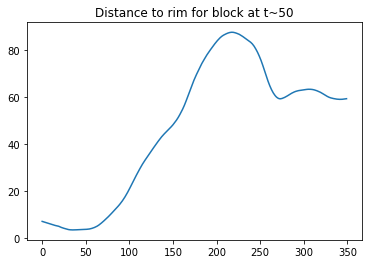

In [151]:
plt.plot(range(len(block_event)), block_event['dist_to_rim_2'])
plt.title('Distance to rim for block at t~50')

Text(0.5, 1.0, 'Acceleration/Velocity towards rim for block at ~t=50')

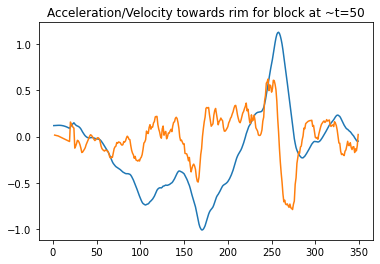

In [150]:
plt.plot(range(len(block_event)), block_event['avg_vel_rim_2'])
plt.plot(range(len(block_event)), block_event['avg_acc_rim_2']*10)
plt.title("Acceleration and Velocity towards rim for block at ~t=50")